# ***Dataset Description ***
The data used for this MModel includes a parallel dataset that contains 27,819 Amhari-Awngi sentence pairs. Amharic phrases, sentences, words  and their corresponding Awngi translations.  The file is an excel file.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
#df = pd.read_csv('amharic_awngi_data.xlsx', encoding=encoding)
df=pd.read_excel("/content/drive/My Drive/Amharic-Awngi/Data/Total-Amharic-Awngi_2.xlsx")
df.head()
#df = pd.read_csv('amharic_awngi_corpus.csv', encoding=encoding)
#df.head()

,Amharic,Awngi
0,መፀዳጃ ቤት ሄዱ፡፡,ቻኺ ጝና ካዃ
1,የደንብ ልብሳቸውን ለበሱ፡፡,ዴንቡሳ ስዮ ሴዩና
2,እጃቸውንና ፊታቸውን ታጠቡ፡፡,ታፎስታ እላፎ ቑሲና
3,ደብተራቸውን፣ መፅሃፋቸውን፣ እርሳስና እስክርቢቷቸውን ወደ ቦርሳቸው ከተቱ፡፡,ዴብቴሮ፡ ሜፃፎ፡እርሳሶስታ እስክርቢቶ ቦርሳሾ ኬቴቱና።
4,ወደ ትምህርት ቤት ሄዱ፡፡,ትምርት ጝናሾ ካሱና።


In [5]:
df.rename(columns={"Awngi ":"Awngi"},inplace=True)
df["Awngi"]=df["Awngi"].fillna(df["Awngi"].mode()[0])
df.head()

,Amharic,Awngi
0,መፀዳጃ ቤት ሄዱ፡፡,ቻኺ ጝና ካዃ
1,የደንብ ልብሳቸውን ለበሱ፡፡,ዴንቡሳ ስዮ ሴዩና
2,እጃቸውንና ፊታቸውን ታጠቡ፡፡,ታፎስታ እላፎ ቑሲና
3,ደብተራቸውን፣ መፅሃፋቸውን፣ እርሳስና እስክርቢቷቸውን ወደ ቦርሳቸው ከተቱ፡፡,ዴብቴሮ፡ ሜፃፎ፡እርሳሶስታ እስክርቢቶ ቦርሳሾ ኬቴቱና።
4,ወደ ትምህርት ቤት ሄዱ፡፡,ትምርት ጝናሾ ካሱና።


Clean the text by removing punctuation symbols and numbers, converting characters to lowercase, and replacing Unicode characters with their ASCII equivalents:

In [6]:
import re
from unicodedata import normalize

def clean_text(text):
    text = normalize('NFD', text.lower())
    #text = re.sub('[^A-Za-z ]+', '', text)
    return text
df3=df.copy()
df['Amharic'] = df['Amharic'].apply(lambda row: clean_text(row))
df['Awngi'] = df['Awngi'].apply(lambda row: clean_text(row))
df.head()

,Amharic,Awngi
0,መፀዳጃ ቤት ሄዱ፡፡,ቻኺ ጝና ካዃ
1,የደንብ ልብሳቸውን ለበሱ፡፡,ዴንቡሳ ስዮ ሴዩና
2,እጃቸውንና ፊታቸውን ታጠቡ፡፡,ታፎስታ እላፎ ቑሲና
3,ደብተራቸውን፣ መፅሃፋቸውን፣ እርሳስና እስክርቢቷቸውን ወደ ቦርሳቸው ከተቱ፡፡,ዴብቴሮ፡ ሜፃፎ፡እርሳሶስታ እስክርቢቶ ቦርሳሾ ኬቴቱና።
4,ወደ ትምህርት ቤት ሄዱ፡፡,ትምርት ጝናሾ ካሱና።


The next step is to scan the phrases and determine the maximum length of the English phrases and then of the French phrases. These lengths will determine the lengths of the sequences input to and output from the model:

In [7]:
am = df['Amharic']
aw = df['Awngi']

am_max_len = max(len(line.split()) for line in am)
aw_max_len = max(len(line.split()) for line in aw)

print(f'Max phrase length (Amharic): {am_max_len}')
print(f'Max phrase length (Awngi): {aw_max_len}')

Max phrase length (Amharic): 75
Max phrase length (Awngi): 75


Now fit one `Tokenizer` to the Amharic phrases and another `Tokenizer` to their Awngi equivalents, and generate padded sequences for all the phrases:

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

am_tokenizer = Tokenizer()
am_tokenizer.fit_on_texts(am)
am_sequences = am_tokenizer.texts_to_sequences(am)
am_x = pad_sequences(am_sequences, maxlen=am_max_len, padding='post')

aw_tokenizer = Tokenizer()
aw_tokenizer.fit_on_texts(aw)
aw_sequences = aw_tokenizer.texts_to_sequences(aw)
aw_y = pad_sequences(aw_sequences, maxlen=aw_max_len, padding='post')

Compute the vocabulary sizes from the `Tokenizer` instances:

In [8]:
am_vocab_size = len(am_tokenizer.word_index) + 1
aw_vocab_size = len(aw_tokenizer.word_index) + 1

print(f'Vocabulary size (Amharic): {am_vocab_size}')
print(f'Vocabulary size (Awngi): {aw_vocab_size}')

Vocabulary size (Amharic): 13082
Vocabulary size (Awngi): 12664


## Build and train a model

Now it's time to define a model. We'll start with an `Embedding` layer followed by an `LSTM` layer that encodes Amharic phrases, words and sentence input to the model. A second `LSTM` layer decodes those phrases into their Awngi equivalents. In between is a `RepeatVector` layer whose purpose is to reshape the output from the first `LSTM` layer for input to the second. The final layer is a softmax classification layer that outputs probabilities for each word in the Awngi vocabulary. The `TimeDistributed` wrapper ensures that the model outputs a set of probabilities for each token (word) in the output rather than just one set for the entire sequence.

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, RepeatVector, TimeDistributed, Dropout

np.random.seed(42)
tf.random.set_seed(42)

model = Sequential()
model.add(Embedding(am_vocab_size, 256, input_length=am_max_len, mask_zero=True))
model.add(LSTM(256))
model.add(RepeatVector(aw_max_len))
model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.4))
model.add(TimeDistributed(Dense(aw_vocab_size, activation='softmax')))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary(line_length=100)

Model: "sequential"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 embedding (Embedding)                       (None, 75, 256)                         3348992        
                                                                                                    
 lstm (LSTM)                                 (None, 256)                             525312         
                                                                                                    
 repeat_vector (RepeatVector)                (None, 75, 256)                         0              
                                                                                                    
 lstm_1 (LSTM)                               (None, 75, 256)                         525312         
                                                                       

Train the model, and use an `EarlyStopping` callback to end training if the validation accuracy fails to improve for three consecutive epochs:

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
hist = model.fit(am_x, aw_y, epochs=50, batch_size=50, validation_split=0.2, callbacks=[callback])

Epoch 1/50
446/446 [==============================] - 69s 131ms/step - loss: 1.0326 - accuracy: 0.9218 - val_loss: 0.6284 - val_accuracy: 0.9333
Epoch 2/50
446/446 [==============================] - 46s 102ms/step - loss: 0.6422 - accuracy: 0.9282 - val_loss: 0.5428 - val_accuracy: 0.9386
Epoch 3/50
446/446 [==============================] - 44s 99ms/step - loss: 0.6031 - accuracy: 0.9289 - val_loss: 0.5106 - val_accuracy: 0.9390
Epoch 4/50
446/446 [==============================] - 42s 95ms/step - loss: 0.5741 - accuracy: 0.9291 - val_loss: 0.4874 - val_accuracy: 0.9390
Epoch 5/50
446/446 [==============================] - 43s 96ms/step - loss: 0.5506 - accuracy: 0.9292 - val_loss: 0.4686 - val_accuracy: 0.9392
Epoch 6/50
446/446 [==============================] - 42s 95ms/step - loss: 0.5309 - accuracy: 0.9294 - val_loss: 0.4444 - val_accuracy: 0.9394
Epoch 7/50
446/446 [==============================] - 43s 96ms/step - loss: 0.5086 - accuracy: 0.9296 - val_loss: 0.4262 - val_accurac

# ***Save The Model***

In [ ]:
model.save('/content/drive/My Drive/Amharic-Awngi/Models/LSTM_translation_model_june22.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Plot the per-epoch training and validation accuracy:

In [9]:
# Assuming 'am_x' is your input data
import numpy as np

# Get the total number of samples
total_samples = len(am_x)

# Calculate the number of samples for training and testing
train_samples = int(0.8 * total_samples)  # 80% for training
test_samples = total_samples - train_samples  # 20% for testing

# Split the data into training and testing sets
X_train = am_x[:train_samples]
X_test = am_x[train_samples:]

# Verify the split
print(f"Total samples: {total_samples}")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Total samples: 27818
Training samples: 22254
Testing samples: 5564


In [10]:
# Assuming 'am_x' and 'aw_y' are your input data
import numpy as np

# Get the total number of samples
total_samples = len(am_x)

# Calculate the number of samples for training and testing
train_samples = int(0.8 * total_samples)  # 80% for training
test_samples = total_samples - train_samples  # 20% for testing

# Split the data into training and testing sets
X_train = am_x[:train_samples]
X_test = am_x[train_samples:]
y_train = aw_y[:train_samples]
y_test = aw_y[train_samples:]

# Verify the split
print(f"Total samples: {total_samples}")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}, {len(y_test)}")

Total samples: 27818
Training samples: 22254
Testing samples: 5564, 5564


In [16]:
X_test[:2]

array([[2944,  907,  907, 1561, 2945, 3789,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [2946, 3790, 1623, 2947,   39,  981, 3791,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,

174/174 [==============================] - 205s 1s/step - loss: 0.0259 - accuracy: 0.9933
Test Loss: 0.025939516723155975
Test Accuracy: 0.9932950139045715


NameError: name 'epochs' is not defined

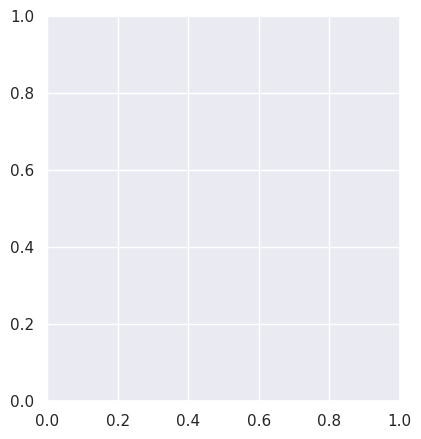

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

%matplotlib inline
sns.set()

# Load the saved model
model3 = load_model('/content/drive/My Drive/Amharic-Awngi/Models/LSTM_translation_model_june22.h5')

# Evaluate the model on the test set
loss, accuracy = model3.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming you have y_test and y_pred
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

In [22]:
print(model3.history.history.keys())

dict_keys([])


In [28]:
import matplotlib.pyplot as plt

# Load the saved model
#model = tf.keras.models.load_model('path/to/saved/model.h5')
model4 = tf.keras.models.load_model('/content/drive/My Drive/Amharic-Awngi/Models/LSTM_translation_model_june22.h5')
# Evaluate the model on the test set
test_loss, test_acc = model4.evaluate(X_test, y_test)

print('Test Accuracy:', test_acc)
print('Test Loss:', test_loss)

# Plot the training and validation accuracy
plt.figure(figsize=(10, 6))
#plt.plot(model4.history.history['accuracy'])
#plt.plot(model4.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(model4.history.history['loss'])
plt.plot(model4.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

174/174 [==============================] - 198s 1s/step - loss: 0.0259 - accuracy: 0.9933
Test Accuracy: 0.9932950139045715
Test Loss: 0.025939516723155975


KeyError: 'accuracy'

<Figure size 1000x600 with 0 Axes>

In [1]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
X_test, y_test
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

%matplotlib inline
sns.set()

# Load the saved model
model3 = load_model('/content/drive/My Drive/Amharic-Awngi/Models/LSTM_translation_model_june22.h5')

# Make predictions on the test set
y_pred = model3.predict(X_test)
y_pred = np.argmax(y_pred, axis=2)

# Flatten the true and predicted labels
y_true_flat = y_test.flatten()
y_pred_flat = y_pred.flatten()

# Compute the confusion matrix
cm = confusion_matrix(y_true_flat, y_pred_flat)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

NameError: name 'X_test' is not defined

[]

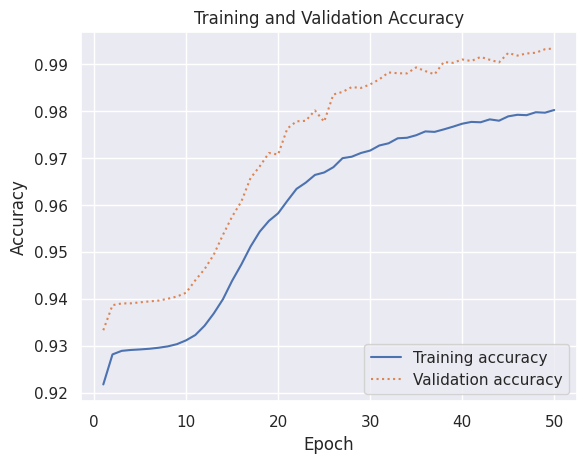

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

## Use the model to translate text

Can the model really translate English to French? Use a subset of the phrases reserved to validate the model to make predictions and see for yourself. Note the use of the French `Tokenizer`’s `sequences_to_texts` method to convert sequences representing French phrases predicted by the model into words:

In [ ]:
def translate_text(text, model, am_tokenizer, aw_tokenizer, am_max_len):
    sequence = am_tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=am_max_len, padding='post')
    prediction = model.predict(padded_sequence, verbose=0)[0]
    indexes = [np.argmax(idx) for idx in prediction]
    return aw_tokenizer.sequences_to_texts([indexes])[0]

texts = am[1:500].values

for text in texts:
    translated = translate_text(text, model, am_tokenizer, aw_tokenizer, am_max_len)
    print(f'{text} => {translated}')

የደንብ ልብሳቸውን ለበሱ፡፡ => ዴንቡሳ ስዮ ሴዩና
እጃቸውንና ፊታቸውን ታጠቡ፡፡ => ታፎስታ እላፎ ቑሲና
ደብተራቸውን፣ መፅሃፋቸውን፣ እርሳስና እስክርቢቷቸውን ወደ ቦርሳቸው ከተቱ፡፡ => ዴብቴሮ፡ ሜፃፎ፡እርሳሶስታ እስክርቢቶ ቦርሳሾ ኬቴቱና።
ወደ ትምህርት ቤት ሄዱ፡፡ => ትምርት ጝናሾ ካሱና።
ከእንቅልፋቸው ተነሱ፡፡ => ሳቔናዴ ጁና
ቦርሳቸውን ያዙ፡፡ => ቦርሳዋ እሚና
የፒያሳ ልጆች መልካሞች ስለሆኑ የተቸገረን ይረዳሉ፡፡ => ፒያሳኩ ጀርካ ክርፅካ ኣኽጝስ ቸጌርስትኹሳ እርዳታና።
ኢትዮጵያ የጀግኖች ሀገር እንጂ የሌቦች አይደለችም፡፡ => ኢቶጵያ ጅግንካት ኣጌራ ጉ ዳዴኽካት ጋቲቲ።
ሰአዳ መምህር እንጂ ሃኪም አይደለችም፡፡ => ሰኣዳ ክትፃንታ ጉ ሐኪማ ጋቲቲ።


# ***BLEU for LSTM MOdel***

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from sacrebleu.metrics import BLEU

# Load the trained GRU model
model1 = load_model('/content/drive/My Drive/Amharic-Awngi/Models/LSTM_translation_model_june22.h5')

In [ ]:
import sacrebleu

def translate_text(text, model, am_tokenizer, aw_tokenizer, am_max_len):
    sequence = am_tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=am_max_len, padding='post')
    prediction = model1.predict(padded_sequence, verbose=0)[0]
    indexes = [np.argmax(idx) for idx in prediction]
    return aw_tokenizer.sequences_to_texts([indexes])[0]

def calculate_bleu_score(reference_texts, candidate_texts):
    """
    Calculate the average BLEU score between the reference texts and the candidate texts.
    """
    total_bleu_score = 0
    for reference, candidate in zip(reference_texts, candidate_texts):
        bleu = sacrebleu.corpus_bleu([candidate], [[reference]])
        total_bleu_score += bleu.score

    average_bleu_score = total_bleu_score / len(reference_texts)
    print(f"Total BLEU score: {total_bleu_score:.2f}")
    return average_bleu_score

# Store the reference French texts and the candidate translated texts
reference_texts = aw[1:500].values
candidate_texts = []

for text in am[1:500].values:
    translated = translate_text(text, model1, am_tokenizer, aw_tokenizer, am_max_len)
    candidate_texts.append(translated)
    print(f'{text} => {translated}')

# Calculate the average BLEU score
average_bleu_score = calculate_bleu_score(reference_texts, candidate_texts)
print(f"Average BLEU score: {average_bleu_score:.2f}")


የደንብ ልብሳቸውን ለበሱ፡፡ => ዝሜናውካ ፊልም ቻኺ
እጃቸውንና ፊታቸውን ታጠቡ፡፡ => ካዃ ዳራዳርኹዋ ጊፂኒ
ደብተራቸውን፣ መፅሃፋቸውን፣ እርሳስና እስክርቢቷቸውን ወደ ቦርሳቸው ከተቱ፡፡ => ሴዩና ታፎስታ አንኪላ ግሪን ዴብቴሮ፡
ወደ ትምህርት ቤት ሄዱ፡፡ => ሜፃፎ፡እርሳሶስታ ካፃማ ጉድያኽ
ከእንቅልፋቸው ተነሱ፡፡ => ቤሮ ስንኪያኽ
ቦርሳቸውን ያዙ፡፡ => ዴክስ እንክራንቲ
የፒያሳ ልጆች መልካሞች ስለሆኑ የተቸገረን ይረዳሉ፡፡ => ሳቄናዴስ ኣድዋው ጌቤልሾ ካሱና። ጁና። ፒያሳኩ
ኢትዮጵያ የጀግኖች ሀገር እንጂ የሌቦች አይደለችም፡፡ => እንፅኻስ ቸጌርስትኹሳ እርዳታና። ካፃን ጅግንካት ይቢቺ
ሰአዳ መምህር እንጂ ሃኪም አይደለችም፡፡ => ኣጌራ ጉ ካፃን ዳዴኽካት ይቢቺ
Total BLEU score: 12.41
Average BLEU score: 1.38


Finally, see how the model translates "Hello world" into French:

In [ ]:
translate_text('ወደ ትምህርት ቤት ሄዱ፡፡', model1, am_tokenizer, aw_tokenizer, am_max_len)

'ትምርት ጝናሾ ካሱና።'

In [ ]:
import numpy as np
from nltk.translate.bleu_score import sentence_bleu
from tensorflow.keras.preprocessing.sequence import pad_sequences

def translate_text(text, model, am_tokenizer, aw_tokenizer, am_max_len):
    sequence = am_tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=am_max_len, padding='post')
    prediction = model.predict(padded_sequence, verbose=0)[0]
    indexes = [np.argmax(idx) for idx in prediction]
    return aw_tokenizer.sequences_to_texts([indexes])[0]

# Example reference and translation texts (use your actual data here)
texts = am[1:500].values
references = aw[1:500].values  # Assuming you have the corresponding French sentences

# Calculate BLEU scores
for text, reference in zip(texts, references):
    translated = translate_text(text, model, am_tokenizer, aw_tokenizer, am_max_len)
    reference_tokens = reference.split()
    translated_tokens = translated.split()
    bleu_score = sentence_bleu([reference_tokens], translated_tokens)

    print(f'{text} => {translated}')
    print(f'Reference: {reference}')
    print(f'BLEU score: {bleu_score:.4f}')

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


የደንብ ልብሳቸውን ለበሱ፡፡ => ዴንቡሳ ስዮ ሴዩና
Reference: ዴንቡሳ ስዮ ሴዩና
BLEU score: 0.0000
እጃቸውንና ፊታቸውን ታጠቡ፡፡ => ታፎስታ እላፎ ቑሲና
Reference: ታፎስታ እላፎ ቑሲና
BLEU score: 0.0000
ደብተራቸውን፣ መፅሃፋቸውን፣ እርሳስና እስክርቢቷቸውን ወደ ቦርሳቸው ከተቱ፡፡ => ዴብቴሮ፡ ሜፃፎ፡እርሳሶስታ እስክርቢቶ ቦርሳሾ ኬቴቱና።
Reference: ዴብቴሮ፡ ሜፃፎ፡እርሳሶስታ እስክርቢቶ ቦርሳሾ ኬቴቱና።
BLEU score: 1.0000
ወደ ትምህርት ቤት ሄዱ፡፡ => ትምርት ጝናሾ ካሱና።
Reference: ትምርት ጝናሾ ካሱና።
BLEU score: 0.0000
ከእንቅልፋቸው ተነሱ፡፡ => ሳቔናዴ ጁና
Reference: ሳቄናዴስ ጁና።
BLEU score: 0.0000
ቦርሳቸውን ያዙ፡፡ => ቦርሳዋ እሚና
Reference: ቦርሳዋ እሚና
BLEU score: 0.0000


/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


የፒያሳ ልጆች መልካሞች ስለሆኑ የተቸገረን ይረዳሉ፡፡ => ፒያሳኩ ጀርካ ክርፅካ ኣኽጝስ ቸጌርስትኹሳ እርዳታና።
Reference: ፒያሳኩ ጀርካ ክርፅካ ኣኽጝስ ቸጌርስትኹሳ እርዳታና።
BLEU score: 1.0000
ኢትዮጵያ የጀግኖች ሀገር እንጂ የሌቦች አይደለችም፡፡ => ኢቶጵያ ጅግንካት ኣጌራ ጉ ዳዴኽካት ጋቲቲ።
Reference: ኢቶጵያ ጅግንካት ኣጌራ ጉ ዳዴኽካት ጋቲቲ።
BLEU score: 1.0000
ሰአዳ መምህር እንጂ ሃኪም አይደለችም፡፡ => ሰኣዳ ክትፃንታ ጉ ሐኪማ ጋቲቲ።
Reference: ሰኣዳ ክትፃንታ ጉ ሐኪማ ጋቲቲ።
BLEU score: 1.0000


## ***Transformer Network***

In [ ]:
import re
from unicodedata import normalize


def clean_and_prepare_text(text):
    text = '[start] ' + clean_text(text) + ' [end]'
    return text

df['Amharic'] = df['Amharic'].apply(lambda row: clean_text(row))
df['Awngi'] = df['Awngi'].apply(lambda row: clean_and_prepare_text(row))
df.head()

,Amharic,Awngi
0,መፀዳጃ ቤት ሄዱ፡፡,[start] ቻኺ ጝና ካዃ [end]
1,የደንብ ልብሳቸውን ለበሱ፡፡,[start] ዴንቡሳ ስዮ ሴዩና [end]
2,እጃቸውንና ፊታቸውን ታጠቡ፡፡,[start] ታፎስታ እላፎ ቑሲና [end]
3,ደብተራቸውን፣ መፅሃፋቸውን፣ እርሳስና እስክርቢቷቸውን ወደ ቦርሳቸው ከተቱ፡፡,[start] ዴብቴሮ፡ ሜፃፎ፡እርሳሶስታ እስክርቢቶ ቦርሳሾ ኬቴቱና። [end]
4,ወደ ትምህርት ቤት ሄዱ፡፡,[start] ትምርት ጝናሾ ካሱና። [end]


In [8]:
am = df['Amharic']
aw = df['Awngi']

am_max_len = max(len(line.split()) for line in am)
aw_max_len = max(len(line.split()) for line in aw)
sequence_len = max(am_max_len, aw_max_len)

print(f'Max phrase length (Amharic): {am_max_len}')
print(f'Max phrase length (Awngi): {aw_max_len}')
print(f'Sequence length: {sequence_len}')

Max phrase length (Amharic): 75
Max phrase length (Awngi): 75
Sequence length: 75


In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

am_tokenizer = Tokenizer()
am_tokenizer.fit_on_texts(am)
am_sequences = am_tokenizer.texts_to_sequences(am)
am_x = pad_sequences(am_sequences, maxlen=sequence_len, padding='post')

aw_tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@\\^_`{|}~\t\n')
aw_tokenizer.fit_on_texts(aw)
aw_sequences = aw_tokenizer.texts_to_sequences(aw)
aw_y = pad_sequences(aw_sequences, maxlen=sequence_len + 1, padding='post')

In [11]:
am_vocab_size = len(am_tokenizer.word_index) + 1
aw_vocab_size = len(aw_tokenizer.word_index) + 1

print(f'Vocabulary size (Amharic): {am_vocab_size}')
print(f'Vocabulary size (Awngi): {aw_vocab_size}')

Vocabulary size (Amharic): 13082
Vocabulary size (Awngi): 12664


In [12]:
inputs = { 'encoder_input': am_x, 'decoder_input': aw_y[:, :-1] }
outputs = aw_y[:, 1:]

In [13]:
!pip install keras_nlp
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from keras_nlp.layers import TokenAndPositionEmbedding, TransformerEncoder
from keras_nlp.layers import TransformerDecoder

np.random.seed(42)
tf.random.set_seed(42)

num_heads = 8
embed_dim = 256

encoder_input = Input(shape=(None,), dtype='int64', name='encoder_input')
x = TokenAndPositionEmbedding(am_vocab_size, sequence_len, embed_dim)(encoder_input)
encoder_output = TransformerEncoder(embed_dim, num_heads)(x)
encoded_seq_input = Input(shape=(None, embed_dim))

decoder_input = Input(shape=(None,), dtype='int64', name='decoder_input')
x = TokenAndPositionEmbedding(aw_vocab_size, sequence_len, embed_dim, mask_zero=True)(decoder_input)
x = TransformerDecoder(embed_dim, num_heads)(x, encoded_seq_input)
x = Dropout(0.4)(x)

decoder_output = Dense(aw_vocab_size, activation='softmax')(x)
decoder = Model([decoder_input, encoded_seq_input], decoder_output)
decoder_output = decoder([decoder_input, encoder_output])

model = Model([encoder_input, decoder_input], decoder_output)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary(line_length=120)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 570.5/570.5 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 65.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 65.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 58.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 26.7 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Suc

ModuleNotFoundError: No module named 'tensorflow.keras.layers'

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 encoder_input (InputLayer)  [(None, None)]               0         []                            
                                                                                                  
 token_and_position_embeddi  (None, None, 256)            3368704   ['encoder_input[0][0]']       
 ng (TokenAndPositionEmbedd                                                                       
 ing)                                                                                             
                                                                                                  
 decoder_input (InputLayer)  [(None, None)]               0         []                            
                                                                                            

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
hist = model.fit(inputs, outputs, epochs=50, validation_split=0.2, callbacks=[callback])

Epoch 1/50
696/696 [==============================] - 86s 106ms/step - loss: 4.3050 - accuracy: 0.4917 - val_loss: 1.4119 - val_accuracy: 0.8053
Epoch 2/50
696/696 [==============================] - 49s 70ms/step - loss: 0.7296 - accuracy: 0.8857 - val_loss: 0.4394 - val_accuracy: 0.9372
Epoch 3/50
696/696 [==============================] - 50s 72ms/step - loss: 0.2459 - accuracy: 0.9559 - val_loss: 0.2251 - val_accuracy: 0.9646
Epoch 4/50
696/696 [==============================] - 45s 64ms/step - loss: 0.1364 - accuracy: 0.9757 - val_loss: 0.1374 - val_accuracy: 0.9763
Epoch 5/50
696/696 [==============================] - 49s 71ms/step - loss: 0.0918 - accuracy: 0.9834 - val_loss: 0.0836 - val_accuracy: 0.9857
Epoch 6/50
696/696 [==============================] - 50s 72ms/step - loss: 0.0674 - accuracy: 0.9880 - val_loss: 0.0618 - val_accuracy: 0.9896
Epoch 7/50
696/696 [==============================] - 45s 64ms/step - loss: 0.0640 - accuracy: 0.9878 - val_loss: 0.0531 - val_accuracy

In [ ]:
model.save('/content/drive/My Drive/Amharic-Awngi/Models/Amh-Awngi-Transformer_Model_translation_model_June22_3.h5')

ValueError: Unable to create dataset (name already exists)

[]

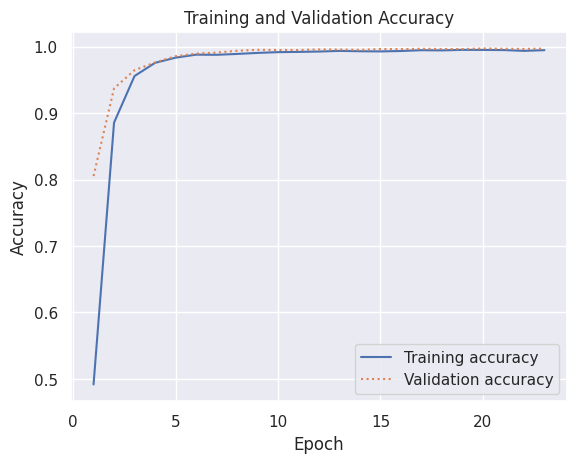

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [ ]:
def translate_text(text, model, am_tokenizer, aw_tokenizer, aw_index_lookup, sequence_len):
    input_sequence = am_tokenizer.texts_to_sequences([text])
    padded_input_sequence = pad_sequences(input_sequence, maxlen=sequence_len, padding='post')
    decoded_text = '[start]'

    for i in range(sequence_len):
        target_sequence = aw_tokenizer.texts_to_sequences([decoded_text])
        padded_target_sequence = pad_sequences(target_sequence, maxlen=sequence_len, padding='post')[:, :-1]

        prediction = model([padded_input_sequence, padded_target_sequence])

        idx = np.argmax(prediction[0, i, :]) - 1
        token = aw_index_lookup[idx]
        decoded_text += ' ' + token

        if token == '[end]':
            break

    return decoded_text[8:-6] # Remove [start] and [end] tokens

aw_vocab = aw_tokenizer.word_index
aw_index_lookup = dict(zip(range(len(aw_vocab)), aw_vocab))
texts = am[1:500].values

for text in texts:
    translated = translate_text(text, model, am_tokenizer, aw_tokenizer, aw_index_lookup, sequence_len)
    print(f'{text} => {translated}')

የደንብ ልብሳቸውን ለበሱ፡፡ => ዴንቡሳ ስዮ ሴዩና
እጃቸውንና ፊታቸውን ታጠቡ፡፡ => ታፎስታ እላፎ ቑሲና
ደብተራቸውን፣ መፅሃፋቸውን፣ እርሳስና እስክርቢቷቸውን ወደ ቦርሳቸው ከተቱ፡፡ => ዴብቴሮ፡ ሜፃፎ፡እርሳሶስታ እስክርቢቶ ቦርሳሾ ኬቴቱና።
ወደ ትምህርት ቤት ሄዱ፡፡ => ትምርት ጝናሾ ካሱና።
ከእንቅልፋቸው ተነሱ፡፡ => ሳቄናዴስ ጁና።
ቦርሳቸውን ያዙ፡፡ => ቦርሳዋ እሚና
የፒያሳ ልጆች መልካሞች ስለሆኑ የተቸገረን ይረዳሉ፡፡ => ፒያሳኩ ጀርካ ክርፅካ ኣኽጝስ ቸጌርስትኹሳ እርዳታና።
ኢትዮጵያ የጀግኖች ሀገር እንጂ የሌቦች አይደለችም፡፡ => ኢቶጵያ ጅግንካት ኣጌራ ጉ ዳዴኽካት ጋቲቲ።
ሰአዳ መምህር እንጂ ሃኪም አይደለችም፡፡ => ሰኣዳ ክትፃንታ ጉ ሐኪማ ጋቲቲ።


In [ ]:
translate_text('እጃቸውንና ፊታቸውን ታጠቡ፡፡', model, am_tokenizer, aw_tokenizer, aw_index_lookup, sequence_len)

'ታፎስታ እላፎ ቑሲና'

In [ ]:
!pip install sacrebleu
import sacrebleu

def translate_text(text, model, am_tokenizer, aw_tokenizer, aw_index_lookup, sequence_len):
    input_sequence = am_tokenizer.texts_to_sequences([text])
    padded_input_sequence = pad_sequences(input_sequence, maxlen=sequence_len, padding='post')
    decoded_text = '[start]'

    for i in range(sequence_len):
        target_sequence = aw_tokenizer.texts_to_sequences([decoded_text])
        padded_target_sequence = pad_sequences(target_sequence, maxlen=sequence_len, padding='post')[:, :-1]

        prediction = model([padded_input_sequence, padded_target_sequence])

        idx = np.argmax(prediction[0, i, :]) - 1
        token = aw_index_lookup[idx]
        decoded_text += ' ' + token

        if token == '[end]':
            break

    return decoded_text[8:-6] # Remove [start] and [end] tokens

def calculate_bleu_score(reference_texts, candidate_texts):
    """
    Calculate the average BLEU score between the reference texts and the candidate texts.
    """
    total_bleu_score = 0
    for reference, candidate in zip(reference_texts, candidate_texts):
        bleu = sacrebleu.corpus_bleu([candidate], [[reference]])
        total_bleu_score += bleu.score

    average_bleu_score = total_bleu_score / len(reference_texts)
    return average_bleu_score

# Store the reference French texts and the candidate translated texts
reference_texts = aw[1:500].values
candidate_texts = []

for text in en[1:10].values:
    translated = translate_text(text, model, am_tokenizer, aw_tokenizer, aw_index_lookup, sequence_len)
    candidate_texts.append(translated)
    print(f'{text} => {translated}')

# Calculate the average BLEU score
average_bleu_score = calculate_bleu_score(reference_texts, candidate_texts)
print(f"Average BLEU score: {average_bleu_score:.2f}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 3.8 MB/s eta 0:00:00
የደንብ ልብሳቸውን ለበሱ፡፡ => ዴንቡሳ ስዮ ሴዩና
እጃቸውንና ፊታቸውን ታጠቡ፡፡ => ታፎስታ እላፎ ቑሲና
ደብተራቸውን፣ መፅሃፋቸውን፣ እርሳስና እስክርቢቷቸውን ወደ ቦርሳቸው ከተቱ፡፡ => ዴብቴሮ፡ ሜፃፎ፡እርሳሶስታ እስክርቢቶ ቦርሳሾ ኬቴቱና።
ወደ ትምህርት ቤት ሄዱ፡፡ => ትምርት ጝናሾ ካሱና።
ከእንቅልፋቸው ተነሱ፡፡ => ሳቄናዴስ ጁና።
ቦርሳቸውን ያዙ፡፡ => ቦርሳዋ እሚና
የፒያሳ ልጆች መልካሞች ስለሆኑ የተቸገረን ይረዳሉ፡፡ => ፒያሳኩ ጀርካ ክርፅካ ኣኽጝስ ቸጌርስትኹሳ እርዳታና።
ኢትዮጵያ የጀግኖች ሀገር እንጂ የሌቦች አይደለችም፡፡ => ኢቶጵያ ጅግንካት ኣጌራ ጉ ዳዴኽካት ጋቲቲ።
ሰአዳ መምህር እንጂ ሃኪም አይደለችም፡፡ => ሰኣዳ ክትፃንታ ጉ ሐኪማ ጋቲቲ።
Average BLEU score: 14.87
